# PHÂN TÍCH TƯƠNG TÁC BÀI VIẾT.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\cmdoptions.py", line 23, i

## Thông tin sơ lược.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Đọc file csv sau khi lưu, bao gồm 100 post.
raw_df = pd.read_csv('Data/hotwheels_done.csv')
len(raw_df)
path = 'Data/hotwheels_done.npy'
post_list = np.load(path,allow_pickle = True)

In [4]:
# Thông tin về dữ liệu của dataframe.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      100 non-null    int64 
 1   post_id         100 non-null    int64 
 2   text            100 non-null    object
 3   time            100 non-null    object
 4   timestamp       100 non-null    int64 
 5   comments        100 non-null    int64 
 6   shares          100 non-null    int64 
 7   user_id         100 non-null    int64 
 8   comments_full   100 non-null    object
 9   reactions       100 non-null    object
 10  reaction_count  100 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 8.7+ KB


## =======================================================================================================

## Phân tích bài viết gần nhất.

In [5]:
# Lượt tương tác (reactions, comments và shares) của bài viết gần nhất.
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

2065
210
364


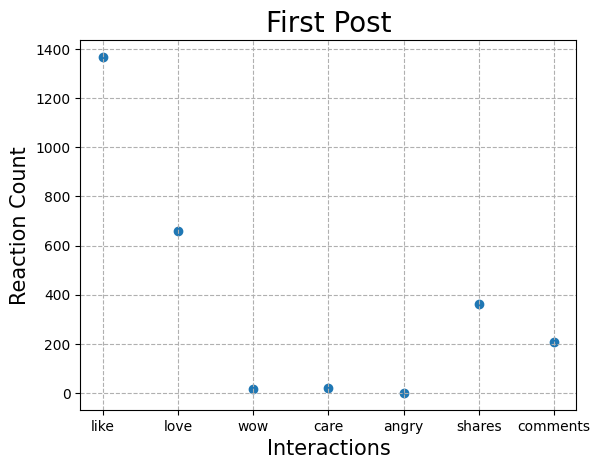

In [6]:
print(raw_df['reaction_count'][0])
print(raw_df['comments'][0])
print(raw_df['shares'][0])

x = reactions.keys()
y = reactions.values()
plt.scatter(x,y)
plt.grid("dark", linestyle = "--")

plt.title('First Post', fontsize = 20)
plt.xlabel("Interactions", fontsize = 15)
plt.ylabel("Reaction Count", fontsize = 15)

plt.savefig("Biểu đồ/1.png")

## =====================================================================================================

## Bài viết có số reactions lớn nhất và bé nhất.

In [7]:
# Bài viết có số reactions lớn nhất của trong 100 bài crawl về - 9500 reactions.

highest_reaction_count = max(raw_df['reaction_count'])
highest_post = raw_df[raw_df['reaction_count'] == highest_reaction_count]
highest_post[['post_id', 'text', 'time', 'reaction_count']]

,post_id,text,time,reaction_count
45,636367022015466,Phoenix's creative garage spirit shines! 🏁🔥 Ch...,2023-09-23 23:30:25,9500


In [8]:
# Bài viết có số reactions thấp nhất trong 100 bài crawl về - 9 reactions.

lowest_reaction_count = min(raw_df['reaction_count'])
lowest_post = raw_df[raw_df['reaction_count'] == lowest_reaction_count]
lowest_post[['post_id', 'text', 'time', 'reaction_count']]

,post_id,text,time,reaction_count
1,662533809398787,"Challengers, let’s race full speed ahead this ...",2023-11-08 06:00:47,9


In [9]:
# Số reactions trung bình của 100 bài.

average_reaction_count = raw_df['reaction_count'].mean()
average_reaction_count

707.65

45    2023-09-23 23:30:25
Name: time, dtype: object
1    2023-11-08 06:00:47
Name: time, dtype: object


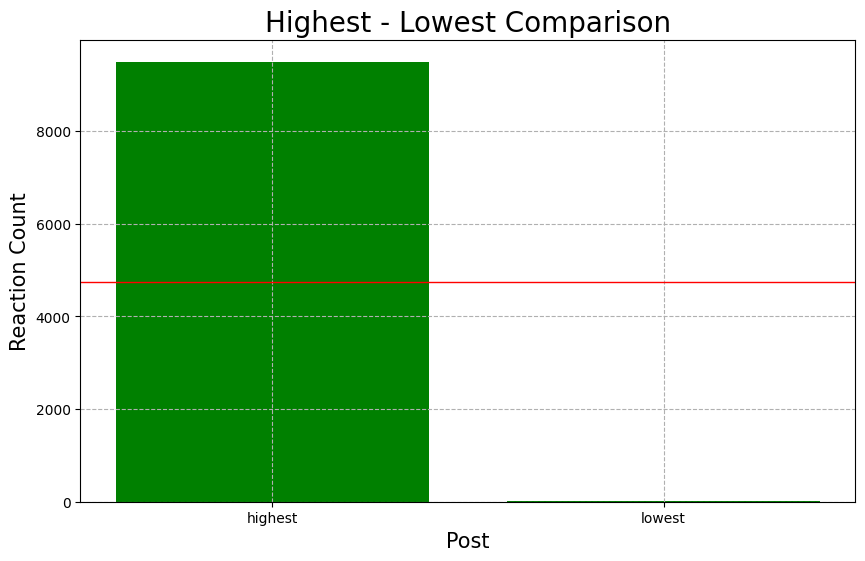

In [10]:
# Thời gian của hai bài đăng trên.
a = highest_post['time']
b = lowest_post['time']
print(a)
print(b)

# Biểu đồ so sánh của hai bài đăng.
plt.figure(figsize = (10,6))
plt.title('Highest - Lowest Comparison', fontsize = 20)
plt.xlabel("Post", fontsize = 15)
plt.ylabel("Reaction Count", fontsize = 15)

x = ["highest", "lowest"]
y = [highest_reaction_count, lowest_reaction_count]

plt.bar(x,y, color = 'green')
plt.grid("dark", linestyle = "--")
plt.axhline(y = np.nanmean(y), color = 'red', linestyle = '-', linewidth = 1, label = 'avg')

plt.savefig("Biểu đồ/2.png")

In [11]:
# Lấy ra nội dung bài đăng nhiều reactions nhất.

content1 = highest_post['text']
pd.set_option('display.max_colwidth', None)
content1

45    Phoenix's creative garage spirit shines! 🏁🔥 Check out some of the best custom cars and moments from today, where passion met creativity in the desert sun! ☀️🚗 #HotWheelsLegends
Name: text, dtype: object

In [12]:
# Lấy ra nội dung bài đăng ít reactions nhất.

content2 = lowest_post['text']
pd.set_option('display.max_colwidth', None)
content2

1    Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\r\n\r\n🗓️ BEST DEALS ONLY on 11.11 🗓️\r\n🤩 UP TO 70% OFF\r\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\r\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\r\n*T&Cs apply.\r\n\r\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\r\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\r\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\r\n\r\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\r\n\r\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\r\n\r\nSHOP NOW at\r\n🧡https://bit.ly/MattelStore_ShopeeSG\r\n💙https://bit.ly/MattelStore_LazadaSG\r\n\r\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG
Name: text, dtype: object

## =====================================================================================================================================================

## Sự biến động của lượng reactions theo dòng thời gian.

In [13]:
# Lấy ra dataframe check gồm 3 cột time, timestamp và reaction_count để thống kê, và đảo lại dataframe.
check = raw_df[['post_id', 'time', 'reaction_count']]

C:\Users\HP\AppData\Local\Temp\ipykernel_9472\995313496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check['time'] = pd.to_datetime(check['time'])


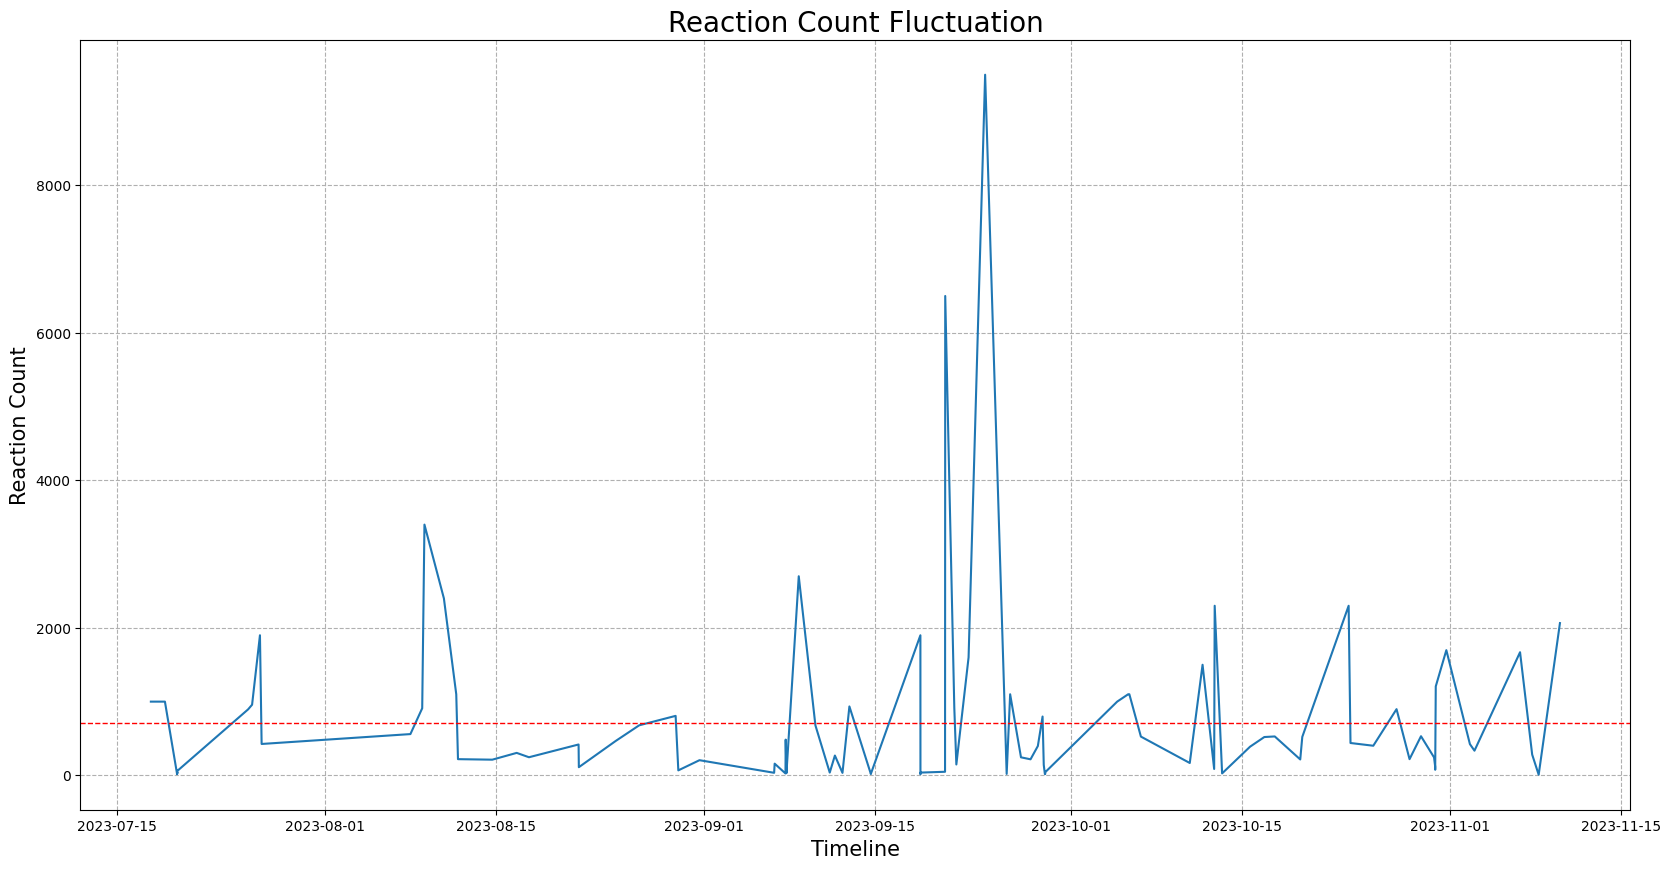

In [14]:
# Biểu đồ thể hiện hiệu xuất react của các bài đăng theo thời gian từ qúa khứ đến hiện tại
check['time'] = pd.to_datetime(check['time'])
x = check['time']
y = check['reaction_count']

plt.figure(figsize = (20,10))
plt.plot(x,y)
plt.grid("dark", linestyle = "--")
plt.title('Reaction Count Fluctuation', fontsize = 20)
plt.xlabel("Timeline", fontsize = 15)
plt.ylabel("Reaction Count", fontsize = 15)


plt.axhline(y=np.nanmean(y), color = 'red', linestyle = '--', linewidth = 1, label = 'avg')

plt.savefig("Biểu đồ/3.png")

## ========================================================================================================

## Thống kê xu hướng tương tác.

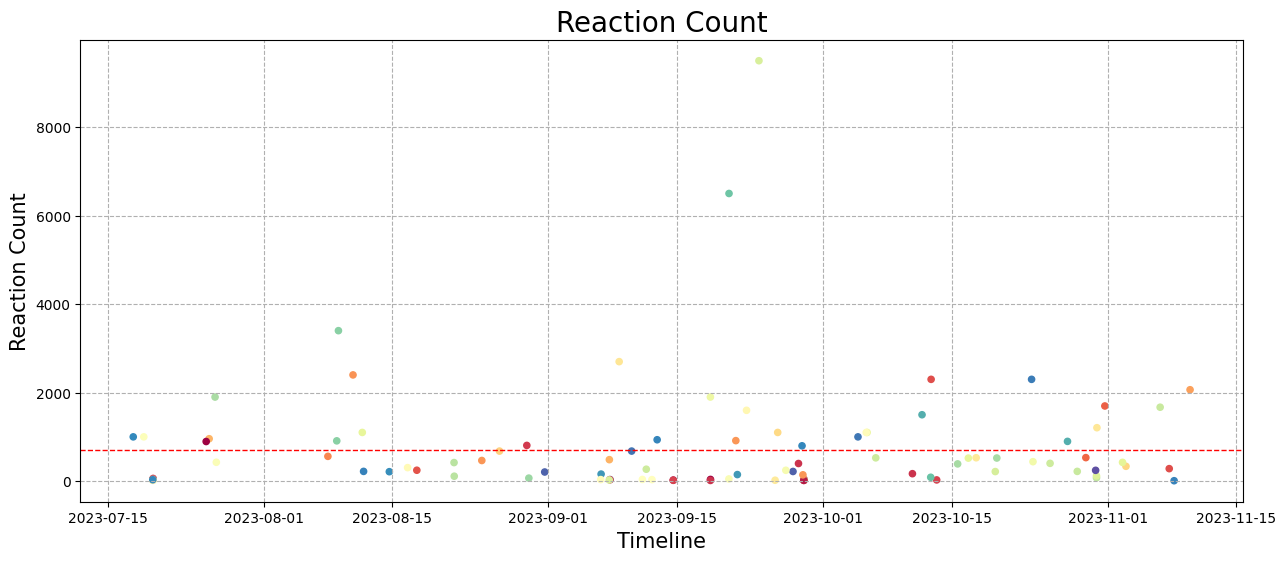

In [15]:
# Biểu đồ phân tán của reactions.
colors = np.random.rand(100)

plt.figure(figsize = (15,6))
plt.title('Reaction Count', fontsize = 20)
plt.xlabel("Timeline", fontsize = 15)
plt.ylabel("Reaction Count", fontsize = 15)

plt.scatter(x, y, s = 20, c = colors, alpha = 1, cmap = 'Spectral')
plt.grid("dark", linestyle = "--")
plt.axhline(y = np.nanmean(y), color = 'red', linestyle = '--', linewidth = 1, label = 'avg')

plt.savefig("Biểu đồ/4.png")


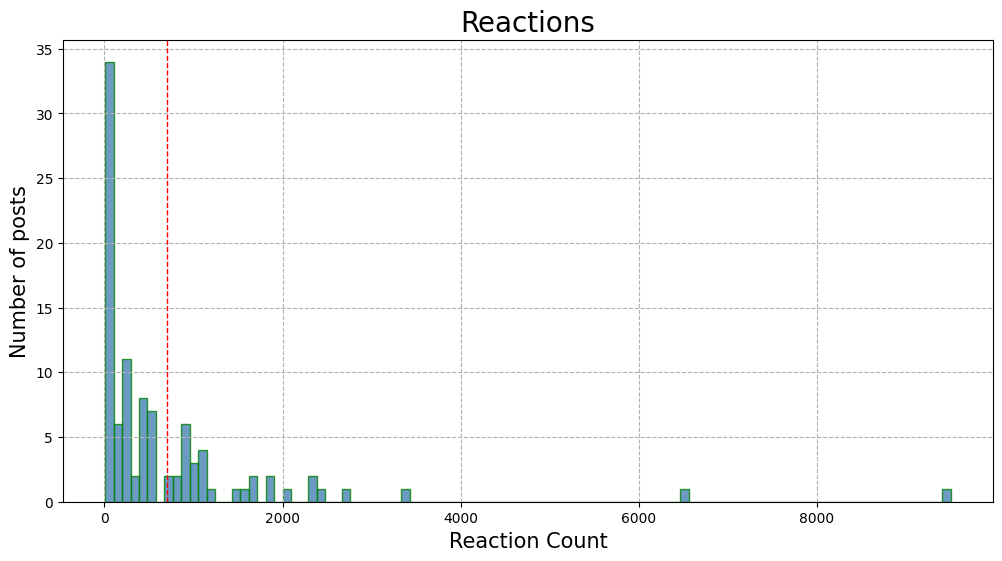

In [16]:
# Biểu đồ thống kê số bài viết với lượng reactions.
plt.subplots(figsize = (12, 6))
plt.hist(y, bins = 100, alpha = 0.8,
          histtype = 'bar', color = 'steelblue',
          edgecolor = 'green')

plt.axvline(y.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.grid("dark", linestyle = "--")
plt.title('Reactions', fontsize = 20)
plt.xlabel("Reaction Count", fontsize = 15)
plt.ylabel("Number of posts", fontsize = 15)

plt.savefig("Biểu đồ/5.png")

## ==================================================================================================


## So sánh các chỉ số tương tác khác nhau.

In [17]:
compare = raw_df[['post_id', 'text', 'time', 'timestamp', 'reaction_count', 'comments', 'shares']].iloc[::-1]
compare

,post_id,text,time,timestamp,reaction_count,comments,shares
99,599621192356716,"Meet 'Tootsie', a 1985 Mercedes-Benz 300D, who now reigns as the finalist at the Hot Wheels Legends Tour Houston stop! 🎉\r\n\r\nBuilt for both function and fun, this reimagined classic flaunts bold fender flairs, a custom lifted suspension, and an unmissable exhaust exiting through the hood.\r\n\r\nThis yard ornament transformed into rally royalty was a collaboration of 30+ students and one passionate teacher from Dekaney High School's Automotive Technology Program. After countless hours of hard work, Tootsie’s journey is a testament to ingenuity and teamwork. Congratulations to David Almanzan and his incredible team of students. 🙌💥🏎️",2023-07-17 18:00:08,1689616808,1000,64,94
98,600244618961040,"Join Hot Wheels, NBC, Rutledge Wood and Dalal Elsheikh tonight at 10PM ET on Threads to live-thread all things Hot Wheels: Ultimate Challenge.",2023-07-18 21:36:24,1689716184,1000,74,73
97,300656448999300,"SUN, SEP 4\r\nHot Wheels Monster Trucks Live!",2023-07-19 21:08:47,1689800927,32,22,0
96,998235587977759,"SUN, SEP 4\r\nHot Wheels Monster Trucks Live!",2023-07-19 21:19:33,1689801573,20,15,0
95,130770646693712,"SUN, SEP 11\r\nHot Wheels Monster Trucks Live!",2023-07-19 21:30:06,1689802206,19,5,0
...,...,...,...,...,...,...,...
4,1276112246404579,"Join us for the Semi-Finals of the Hot Wheels Legends Tour! Watch LIVE judging from a panel of celebrities and top motorsport athletes, including Coco Zurita, Aimee Shackelford, and Eric Kendricks\r\nThe Hot Wheels Legends Tour, now in its sixth year, is a global search for the next fan-made custom car to be made into a Hot Wheels die-cast.\r\n\r\nThe Hot Wheels Legends Tour is made possible in partnership with Walmart and Presenting Sponsor, Mobil 1.\r\nLearn more about the Hot Wheels Legends Tour at www.hotwheels.com/legends",2023-11-03 00:00:18,1698969618,335,493,56
3,661756316143203,"This Saturday marks the sixth Hot Wheels Legends Tour Global Finale.\r\n\r\nBefore we crown a new winner, let’s open up the vault and take a look back at all of our previous winners. 🏆",2023-11-06 17:27:08,1699291628,1670,90,212
2,662301126088722,Tune in this Saturday for the Hot Wheels Legends Tour Global Grand Finale and see which car will be chosen to be immortalized into a Hot Wheels 1:64 scale die-cast.\r\n\r\nStreaming live 11.11.2023 at 9am PST on Hot Wheels social channels and MattelCreations.com.,2023-11-07 17:15:04,1699377304,282,58,39
1,662533809398787,"Challengers, let’s race full speed ahead this 11 Nov! ENJOY UP TO 70% OFF with Shopee 11.11 Big Sale & Lazada’s 11.11 Biggest Sale of The Year!\r\n\r\n🗓️ BEST DEALS ONLY on 11.11 🗓️\r\n🤩 UP TO 70% OFF\r\n🤩 Shopee : EXTRA UP TO $26 OFF Voucher*\r\n🤩 Lazada : EXTRA UP TO $22 OFF Voucher*\r\n*T&Cs apply.\r\n\r\n💡🎁GIFT-WITH-PURCHASE AWAITS EACH STORE💡\r\n🧡Shopee: FREE 1x Thomas Storage Box with min. purchase of $60 & above on any products.\r\n💙Lazada: FREE 1x Hot Wheels Limited Edition Drawstring Bag with min. purchase of $40 & above on any products.\r\n\r\n🚗🏎️💨 Shop & build tracks, zoom, flip, stunt, crash… all the way with Hot Wheels City, Monster Trucks, and more!🔥\r\n\r\n🎁Don't miss out, add-to-cart the most exciting 11.11 deals now while stocks last!⏰\r\n\r\nSHOP NOW at\r\n🧡https://bit.ly/MattelStore_ShopeeSG\r\n💙https://bit.ly/MattelStore_LazadaSG\r\n\r\n#ShopeeSG #Shopee1111BigSale #Lazada1111 #LazadaSG #MattelSG",2023-11-08 06:00:47,1699423247,9,0,1


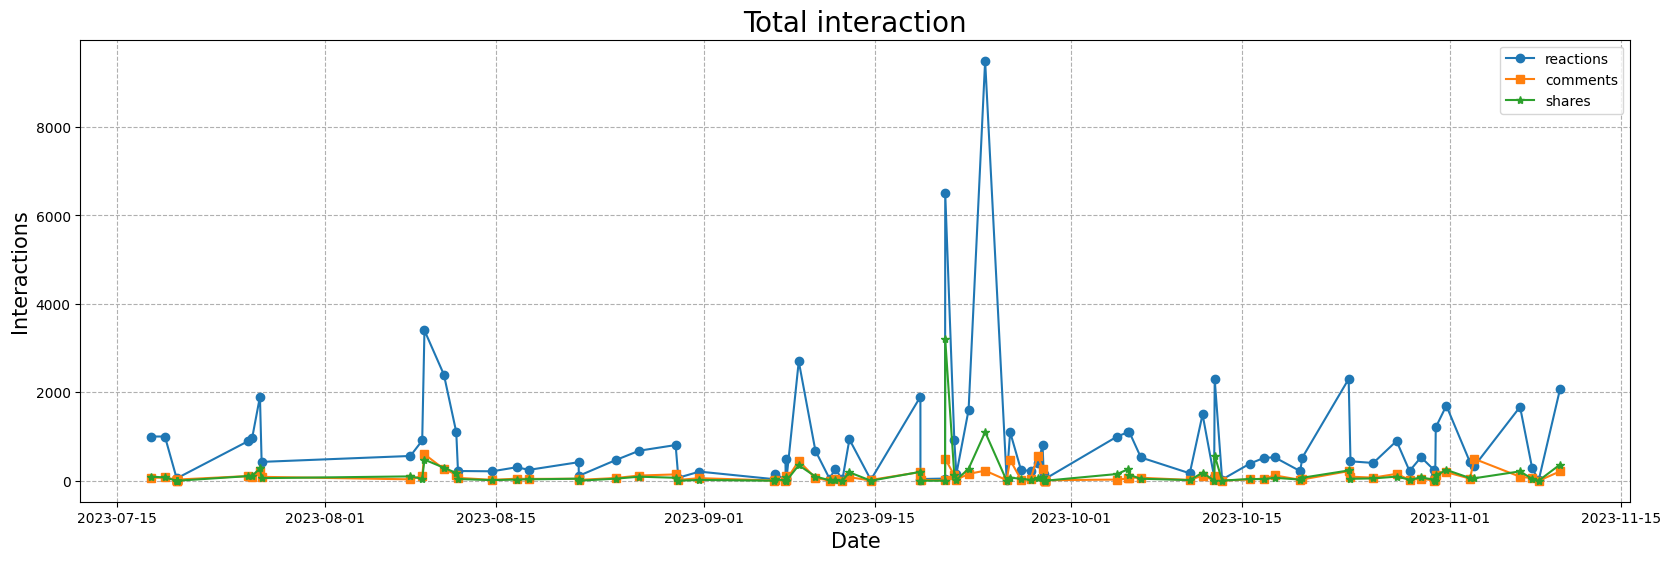

In [18]:
# Biểu đồ tổng lượng tương tác.
compare['time'] = pd.to_datetime(compare['time'])
dates = compare['time']
x = compare['reaction_count']
y = compare['comments']
z = compare['shares']

plt.figure(figsize = (20,6))
plt.title('Total interaction', fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Interactions", fontsize = 15)

plt.plot(dates, x, label = "reactions", marker = "o")
plt.plot(dates, y, label = "comments", marker = "s")
plt.plot(dates, z, label = "shares", marker = "*")
plt.grid("dark", linestyle = "--")

plt.legend()

plt.savefig("Biểu đồ/6.png")